<a href="https://colab.research.google.com/github/RodrigoPretes/API_node.js/blob/main/TrabalhoRedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:

# Instala a biblioteca
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

# Importando pacotes necessários
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Carrega conjunto de dados
dados = pd.read_csv('/content/Hypertensao_Treinamento.txt')
dados.head()   # Ver dados Carregados

2.13.0


,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio,Classe A+ até F-
0,54,Masculino,A,+,95.2352,438.27,2.468254,149.728732,66,178,32,2.000264,9.1208,A+
1,65,Masculino,A,-,95.9146,444.10,4.318468,371.786259,46,142,46,1.000219,0.8231,C-
2,48,Masculino,B,+,72.0488,735.26,3.592467,792.534537,78,169,166,0.800336,1.5197,D+
3,83,Feminino,O,+,43.9004,892.30,6.606650,941.055245,41,168,76,1.600633,9.6174,B+
4,16,Masculino,B,-,83.8091,95.50,0.912195,448.457138,52,187,29,1.600361,2.4490,B+


In [87]:
# Divide em Entrada e Resposta
X = dados.iloc[:,0:13]    #  Entrada

scaler = StandardScaler()  # Normaliza dos Dados

for i in range(len(X)):
    if X.iloc[i,1] == 'Masculino':
        X.iloc[i,1] = 1
    if X.iloc[i,1] == 'Feminino':
        X.iloc[i,1] = 0

    if X.iloc[i,2] == 'A':
        X.iloc[i,2] = 1
    if X.iloc[i,2] == 'B':
        X.iloc[i,2] = 2
    if X.iloc[i,2] == 'AB':
        X.iloc[i,2] = 3
    if X.iloc[i,2] == 'O':
        X.iloc[i,2] = 4

    if X.iloc[i,3] == '+':
        X.iloc[i,3] = 1
    if X.iloc[i,3] == '-':
        X.iloc[i,3] = 0



X.head()  # Ver as entradas Normalizadas
X

,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio
0,54,1,1,1,95.2352,438.27,2.468254,149.728732,66,178,32,2.000264,9.1208
1,65,1,1,0,95.9146,444.10,4.318468,371.786259,46,142,46,1.000219,0.8231
2,48,1,2,1,72.0488,735.26,3.592467,792.534537,78,169,166,0.800336,1.5197
3,83,0,4,1,43.9004,892.30,6.606650,941.055245,41,168,76,1.600633,9.6174
4,16,1,2,0,83.8091,95.50,0.912195,448.457138,52,187,29,1.600361,2.4490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,58,1,4,1,76.9499,170.09,8.089927,533.260118,66,143,96,0.200732,7.4090
896,67,1,1,1,10.5724,951.45,8.705298,63.376158,89,184,82,0.600830,7.9235
897,41,1,4,1,30.3262,62.45,7.766839,204.769096,66,165,100,0.200574,0.7144
898,51,1,1,0,35.5674,264.41,9.673609,571.310292,68,145,191,0.800565,6.3084


In [90]:
X = scaler.fit_transform(X)


Y1 = dados.iloc[:,13]

for i in range(len(Y1)):
    if Y1.iloc[i] == 'A+':
        Y1.iloc[i] = 1
    if Y1.iloc[i] == 'A-':
        Y1.iloc[i] = 2
    if Y1.iloc[i] == 'B+':
        Y1.iloc[i] = 3
    if Y1.iloc[i] == 'B-':
        Y1.iloc[i] = 4
    if Y1.iloc[i] == 'C+':
        Y1.iloc[i] = 5
    if Y1.iloc[i] == 'C-':
        Y1.iloc[i] = 6
    if Y1.iloc[i] == 'D+':
        Y1.iloc[i] = 7
    if Y1.iloc[i] == 'D-':
        Y1.iloc[i] = 8
    if Y1.iloc[i] == 'E+':
        Y1.iloc[i] = 9
    if Y1.iloc[i] == 'E-':
        Y1.iloc[i] = 10

Y1.head();


In [91]:
Y2 = []
for i in range(len(Y1)):
  linha = []
  for j in range(10):
    if (j+1) == Y1[i]:
      linha += [1]
    else:
      linha += [0]
  Y2.append(linha)

YY = pd.DataFrame(data=Y2,columns=['Tipo01', 'Tipo02', 'Tipo03', 'Tipo04', 'Tipo05', 'Tipo06','Tipo07','Tipo08','Tipo09','Tipo10'])
YY.head();



In [92]:
# Define o Modelo
modelo = Sequential()
modelo.add(Dense(13, input_dim=13, activation='relu'))
modelo.add(Dense(10, activation='sigmoid'))
# Compila o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Treina o Modelo
resultado = modelo.fit(X, YY, batch_size = 400, epochs = 2000)

modelo.summary()  # Mostra a rede

Epoch 1/2000
3/3 [==============================] - 1s 5ms/step - loss: 0.7101 - accuracy: 0.0989
Epoch 2/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.1000
Epoch 3/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.1011
Epoch 4/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.1022
Epoch 5/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6765 - accuracy: 0.1022
Epoch 6/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.1011
Epoch 7/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.6609 - accuracy: 0.1000
Epoch 8/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6533 - accuracy: 0.1000
Epoch 9/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6459 - accuracy: 0.0989
Epoch 10/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6387 - accuracy: 0.0978
Epoch 11/2000
3/3 [

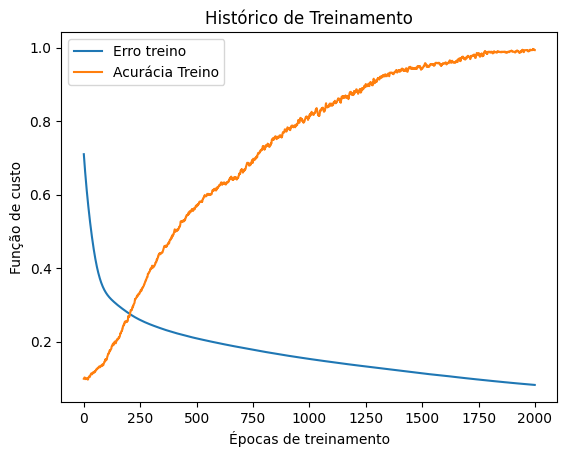

In [93]:
# Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()

In [94]:
testes = pd.read_csv('/content/Hypertensao_Teste.txt')
testes.head() # Ver testes

,Idade,Sexo,Tipo Sanguinio,Fator RH,Colesterol,HDL,Triglicerídeos,Creatinina,Peso (Kg),Altura (cm),Glicemia,Gamma GT,Sódio/Potássio
0,27,Feminino,AB,+,41.5768,852.58,0.892731,286.676766,64,164,61,2.000863,1.3113
1,64,Feminino,O,-,34.0087,385.61,5.207090,711.427331,41,151,67,2.000023,4.1241
2,85,Feminino,O,+,17.8986,773.54,5.591843,531.001899,86,181,4,2.000794,4.0406
3,80,Feminino,A,-,65.4376,725.19,0.403309,138.208942,42,163,162,1.800022,3.8163
4,90,Feminino,A,+,2.0596,670.06,2.778385,986.478842,45,183,113,1.800594,7.7449


In [95]:
# Divide em Entrada e Resposta
XTeste = dados.iloc[:,0:13]    #  Entrada

for i in range(len(XTeste)):
    if XTeste.iloc[i,1] == 'Masculino':
        XTeste.iloc[i,1] = 1
    if XTeste.iloc[i,1] == 'Feminino':
        XTeste.iloc[i,1] = 0

    if XTeste.iloc[i,2] == 'A':
        XTeste.iloc[i,2] = 1
    if XTeste.iloc[i,2] == 'B':
        XTeste.iloc[i,2] = 2
    if XTeste.iloc[i,2] == 'AB':
        XTeste.iloc[i,2] = 3
    if XTeste.iloc[i,2] == 'O':
        XTeste.iloc[i,2] = 4

    if XTeste.iloc[i,3] == '+':
        XTeste.iloc[i,3] = 1
    if XTeste.iloc[i,3] == '-':
        XTeste.iloc[i,3] = 0


XTeste = scaler.fit_transform(XTeste) # Normaliza dos Testes
XTeste



array([[-0.03464076,  0.99115027, -1.33734116, ..., -1.20616681,
         1.50896105,  1.40159931],
       [ 0.42630482,  0.99115027, -1.33734116, ..., -0.95959098,
        -0.22558691, -1.46832491],
       [-0.28606562,  0.99115027, -0.45751145, ...,  1.15391622,
        -0.57227664, -1.22739197],
       ...,
       [-0.57939462,  0.99115027,  1.30214797, ..., -0.00851274,
        -1.61254651, -1.50592096],
       [-0.16035319,  0.99115027, -1.33734116, ...,  1.59423022,
        -0.57187979,  0.42887496],
       [ 0.09107167, -1.00892875,  0.42231826, ...,  0.34373846,
        -1.26497081,  0.36568454]])

In [100]:
Y_predito = modelo.predict(XTeste)
print("Valores Preditos:",Y_predito)
Y_predito1 = np.array([])
Y_Resposta1 = np.array([])
for i in Y_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    Y_predito1 = np.concatenate((Y_predito1,Y_parte))
    for j in range(len(Y_parte)):
        if Y_parte[j]==1:
            Resp = ([j+1])
    Y_Resposta1 = np.concatenate((Y_Resposta1,Resp))
Y_Resposta1 # Ver os Resuladados
Y_Resposta = pd.DataFrame(data=Y_Resposta1, dtype=np.int8, columns=['Tipo 1 a 10'])
Y_Resposta # Ver a Resposta

29/29 [==============================] - 0s 3ms/step
Valores Preditos: [[9.7567195e-01 4.1292271e-01 1.7324788e-02 ... 1.2387628e-19
  1.1271392e-14 3.1092407e-26]
 [1.9529540e-13 4.2450306e-08 9.9498167e-11 ... 3.5725029e-03
  8.0199155e-04 9.2408588e-11]
 [3.4209147e-15 1.4785988e-10 1.6819899e-15 ... 2.1856035e-01
  4.3530703e-02 5.6676106e-07]
 ...
 [6.8485948e-19 4.6165790e-18 1.4776336e-30 ... 5.8402862e-02
  4.8925161e-01 9.3871415e-01]
 [2.8612227e-14 6.0271156e-11 6.6915910e-16 ... 9.6622042e-02
  3.7883125e-02 3.1036109e-08]
 [2.7019769e-16 3.8660931e-13 2.8674694e-20 ... 2.3116583e-01
  3.8694200e-01 6.8193518e-02]]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0,

,Tipo 1 a 10
0,1
1,6
2,7
3,3
4,3
...,...
895,10
896,8
897,10
898,7


In [97]:
 #Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

0B -> L1N0: 2.852682113647461
0B -> L1N1: 1.1437429189682007
0B -> L1N2: 2.270545482635498
0B -> L1N3: 2.733919382095337
0B -> L1N4: 2.5027310848236084
0B -> L1N5: 0.8561772704124451
0B -> L1N6: 3.9042158126831055
0B -> L1N7: 0.6725172400474548
0B -> L1N8: -0.6398729085922241
0B -> L1N9: 0.47746041417121887
0B -> L1N10: 0.9695701599121094
0B -> L1N11: 2.4022393226623535
0B -> L1N12: 3.2882442474365234
L0N0                -> L1N0 = 0.010881041176617146
L0N0                -> L1N1 = -0.007541879545897245
L0N0                -> L1N2 = -0.0021466936450451612
L0N0                -> L1N3 = -0.5062779188156128
L0N0                -> L1N4 = 0.08697473257780075
L0N0                -> L1N5 = -0.46906670928001404
L0N0                -> L1N6 = 0.6333224773406982
L0N0                -> L1N7 = 0.0002970257482957095
L0N0                -> L1N8 = -0.013314939104020596
L0N0                -> L1N9 = -0.12935079634189606
L0N0                -> L1N10 = 0.1974852830171585
L0N0                -> L1N11 = 0.0